In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1. Получите данные и загрузите их в рабочую среду

In [2]:
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### 2. Проведите первичный анализ
- а) Проверьте количество записей для каждого класса. Сделайте вывод

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
df.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

**Исходя из того как каждый класс представлен в датасете можно сделать вывод, что имеется задача многоклассовой классификации с несбалансированными классами. В таком случае лучше прибегнуть к стратификации при разбиении выборки на обучающую и тестовую.**

### 3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(['Type'], axis=1)
y = df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 4. Обучите модель дерева решений RandomForestClassifier на обучающем множестве

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy)

In [8]:
from sklearn.metrics import classification_report

initial_report = classification_report(y_test, rf.predict(X_test))
print(initial_report)

              precision    recall  f1-score   support

           1       0.76      0.93      0.84        14
           2       0.85      0.73      0.79        15
           3       1.00      0.67      0.80         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.84        43
   macro avg       0.88      0.83      0.84        43
weighted avg       0.85      0.84      0.84        43



### 6. Обработайте выбросы в данных
- а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?


- b) Исследуйте признаки на выбросы несколькими способами


- c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса

Я буду отрисовывать группы по 3 признака. Для определения нормальности распределения я буду пользоваться критерием Шапиро-Уилка. Полученное критерием значение p-value должно быть больше, или равно 0.05, чтобы распределение можно было назвать статистически нормальным.

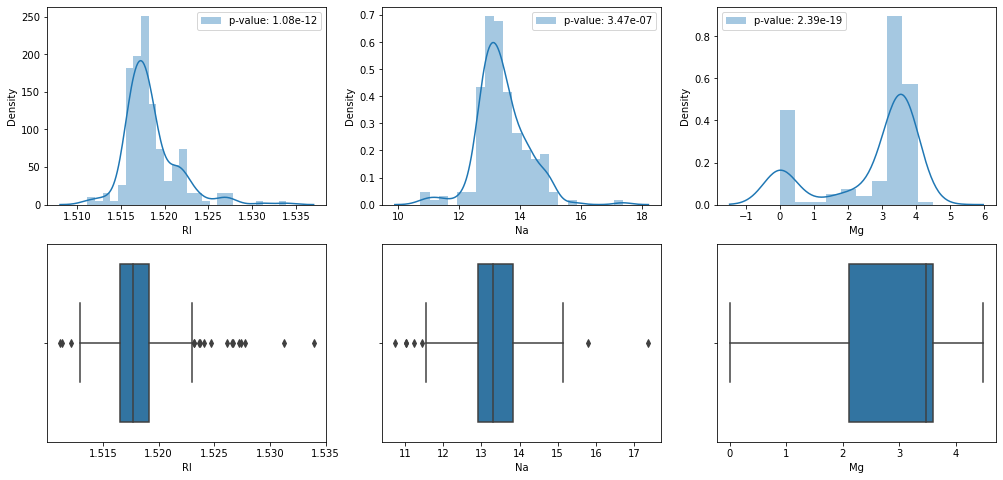

In [9]:
from scipy.stats import shapiro

def plots(n):
    fig, axs = plt.subplots(2, 3, figsize=(17,8))
    for i, col in enumerate(X.columns[n-3:n]):
        p_value = shapiro(X[col]).pvalue
        sns.distplot(X[col], ax=axs[0, i], label=f'p-value: {p_value:.3g}').legend()
        sns.boxplot(X[col], ax=axs[1, i])

plots(3)

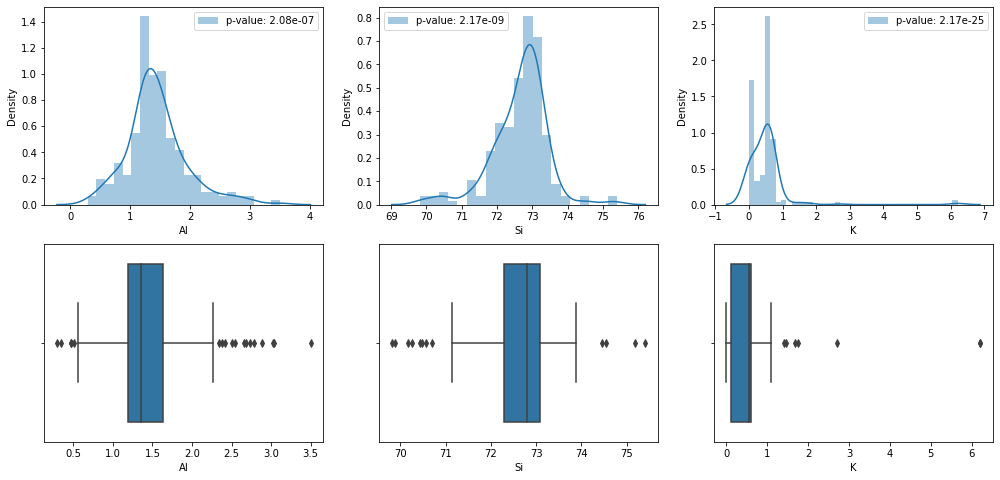

In [10]:
plots(6)

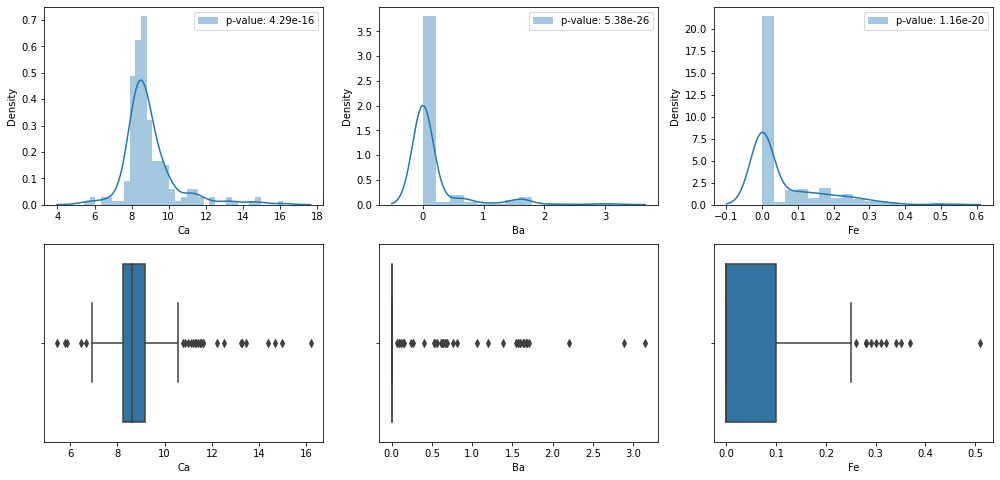

In [11]:
plots(9)

Согласно критерию Шапиро-Уилка ни один из признаков нельзя назвать статистически нормально распределенным. Это может быть связано с большим количеством выбросов, которые легко можно наблюдать как на отрисованных гистограмммах так и на боксплотах. Во всех признаках, кроме `Mg` такие выбросы имеются.

Колоколообразные гистограммы, похожие на нормальное распределение строятся для следующих признаков: `RI, Na, Al, Si, Ca`. Скорее всего очистка датасета от выбросов сделает распределения в этих признаках еще более похожими на нормальное.

Для определения выбросов я воспользуюсь несколькими методами, а затем большинством голосов определю какие объекты будут удалены из датасета по подозрению в наличии выбросов. Первый метод статистический, его реализация для выбросов как раз представлена на боксплотах. Я воспользуюсь формулой того, что для каждого признака выбросы лежат вне диапазона между `Q1 - 1.5 * IQR и Q3 + 1.5 * IQR`.

Три других метода основаны на моделях машинного обучения, это `OneClassSVM`, `IsolationForest` и `LocalOutlierFactor`.

In [12]:
from scipy.stats import iqr
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

X['outlier_score'] = 0

for col in X.columns:
    Q1, Q3 = np.percentile(X[col], [25, 75])
    IQR = iqr(X[col])
    low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    X['outlier_score'] += np.where(X[col].between(low, high) | X['outlier_score'] == 1, 0, 1)

X['outlier_score'] += np.where(OneClassSVM(nu=0.1).fit_predict(X) == 1, 0, 1)
X['outlier_score'] += np.where(IsolationForest(random_state=42).fit_predict(X) == 1, 0, 1)
X['outlier_score'] += np.where(LocalOutlierFactor().fit_predict(X) == 1, 0, 1)

outliers = X[X['outlier_score'] >= 3]
print(f'Итого, большинством голосов в датасете признано {len(outliers)} выбросов')
outliers

Итого, большинством голосов в датасете признано 21 выбросов


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,outlier_score
103,1.52725,13.80,3.15,0.66,70.57,0.08,11.64,0.00,0.00,4
105,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,3
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,4
107,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24,4
110,1.52664,11.23,0.00,0.77,73.21,0.00,14.68,0.00,0.00,3
111,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00,4
112,1.52777,12.64,0.00,0.67,72.02,0.06,14.40,0.00,0.00,3
131,1.52614,13.70,0.00,1.36,71.24,0.19,13.44,0.00,0.10,3
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,4
166,1.52151,11.03,1.71,1.56,73.44,0.58,11.62,0.00,0.00,3


**Перед удалением выбросов посчитаем какая доля объектов будет удалена для каждого из классов**

In [13]:
outliers.join(y).groupby('Type').outlier_score.count() / X.join(y).groupby('Type').outlier_score.count()

Type
1         NaN
2    0.105263
3         NaN
5    0.384615
6    0.222222
7    0.206897
Name: outlier_score, dtype: float64

In [14]:
X = X[~X.index.isin(outliers.index)].drop('outlier_score', axis=1)
y = y[~y.index.isin(outliers.index)]

### 7. Повторите п. 4, п. 5

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

print(classification_report(y_test, rf.predict(X_test)))
print('********Изначальный отчет:********')
print(initial_report)

              precision    recall  f1-score   support

           1       0.76      0.93      0.84        14
           2       0.79      0.79      0.79        14
           3       1.00      0.33      0.50         3
           5       0.50      0.50      0.50         2
           6       1.00      1.00      1.00         1
           7       1.00      0.80      0.89         5

    accuracy                           0.79        39
   macro avg       0.84      0.72      0.75        39
weighted avg       0.81      0.79      0.79        39

********Изначальный отчет:********
              precision    recall  f1-score   support

           1       0.76      0.93      0.84        14
           2       0.85      0.73      0.79        15
           3       1.00      0.67      0.80         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.8

### 8. Сформулируйте выводы по проделанной работе
- а) Кратко опишите, какие преобразования были сделаны с данными.

В ходе работы с помощью статистических и модельных методов был определен 21 выброс в данных. Затем эти выбросы были удалены из датасета.

- b) Сравните точность двух моделей.

Пожалуй, можно было предположить изначально, что набор данных довольно скуден для поставленной задачи по удалению выбросов. Кроме этого, присутствует сильный дисбаланс между шестью представленными классами. Самый населенный класс включает 76 объектов, в то время как самый необитаемый состоит лишь из 9 объектов. В такой ситуации для объектов из небольших классов существенно выше риск оказаться быть принятыми за выбросы.

В итоге модель, построенная на данных "очищенных от выбросов" оказалась слабее своего предшественника. Точность снизилась с `0.84` до `0.79`. Не только общая точность упала, но и практически все остальные метрики тоже, включая метрики качества классификации каждого класса в отдельности. Обе модели уверенно определяют объекты из широко представленных 1 и 2 классов, но затем вторая модель сильно теряет в качестве определения 3 и 5 классов, слабо представленных в датасете.

- c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.

Если нет уверенности, что данные обладают достаточным качеством для поставленной задачи, то исследовать их на выбросы нужно. Наличие выбросов негативно сказывается на способностях моделей к обобщению, поскольку вносят в данные экстремальный шум, который вынужден учитывать в процессе своей работы обучающийся алгоритм. За счет этого оценка алгоритма получается смещенной относительно правильно обобщенного ответа в сторону выброса.

Необходимо четко определять границы выбросов, чтобы их удаление не привело к потере важной части информации. Если данных достаточно, и удаление выбросов не отразится на целостности датасета, то на такой шаг вполне можно идти. В ситации, когда данных мало, но при этом наличие выбросов очевидно, лучше попытаться заменить их на значения, более соответствующие набору данных.